In [6]:
import numpy as np
import sys
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline 

data = pd.read_csv('./data/Ames_Housing_Price_Data.csv', index_col=0)
print(data.shape)
data.drop_duplicates(inplace=True)
print(data.shape)


(2580, 81)
(2579, 81)


In [7]:
print(data.nunique().head())

PID           2579
GrLivArea     1213
SalePrice      870
MSSubClass      16
MSZoning         7
dtype: int64


In [8]:
data["SalePricePerGLA"] = data["SalePrice"] / data["GrLivArea"]
describe_df = data.describe(include='all')
describe_df.to_csv(r'describe_df.csv', index = True)
describe_df.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePricePerGLA
count,2.579000e+03,2579.000000,2579.00000,2579.000000,2579,2117.000000,2579.000000,2579,168,2579,...,2579.00000,9,525,97,2579.000000,2579.000000,2579.000000,2579,2579,2579.000000
unique,NaN,NaN,NaN,NaN,7,NaN,NaN,2,2,4,...,NaN,4,4,4,NaN,NaN,NaN,10,6,NaN
top,NaN,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,...,NaN,TA,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,NaN,NaN,2007,NaN,NaN,2569,105,1640,...,NaN,3,301,88,NaN,NaN,NaN,2391,2413,NaN
mean,7.147546e+08,1485.950368,178053.44242,57.694843,NaN,68.510628,10119.269484,NaN,NaN,NaN,...,1.66266,NaN,NaN,NaN,48.750291,6.152385,2007.839085,NaN,NaN,120.907035


In [9]:
numericaldata = data[['GrLivArea', 'SalePrice','LotFrontage', 'LotArea',
    'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
    'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
    'MiscVal', 'MoSold', 'YrSold', 'SalePricePerGLA', 'BsmtFullBath', 'BsmtHalfBath', 
    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd']]

# Nixon features: BsmtCond, MiscFeature(?), Electrical(?), LandContour, 
#   PavedDrive(?), LandSlope(?), Utilities, Alley(?), Street
# Aleksey features: SaleType, Condition1, Condition2, RoofMatl, Functional, 
#   Heating, BsmtFinType2, SaleCondition, ExterCond, GarageQual

categoricaldata = data[['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 
    'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 
    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 
    'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
    'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 
    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
    'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 
    'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
    'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 
    'MiscFeature', 'SaleType', 'SaleCondition']].replace(np.nan,value="NoneListed")
# 33     BsmtFullBath
# 34     BsmtHalfBath
#FullBath 35
#HalfBath 36
#BedroomAbvGr 37
#KitchenAbvGr 38
#TotRmsAbvGrd 40

cat_features = list(categoricaldata.columns)
cat_feat_series = pd.Series(cat_features)
#print(cat_feat_series)

MSSubClass: Identifies the type of dwelling involved in the sale.
20	1-STORY 1946 & NEWER ALL STYLES
30	1-STORY 1945 & OLDER
40	1-STORY W/FINISHED ATTIC ALL AGES
45	1-1/2 STORY - UNFINISHED ALL AGES
50	1-1/2 STORY FINISHED ALL AGES
60	2-STORY 1946 & NEWER
70	2-STORY 1945 & OLDER
75	2-1/2 STORY ALL AGES
80	SPLIT OR MULTI-LEVEL
85	SPLIT FOYER
90	DUPLEX - ALL STYLES AND AGES
120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
150	1-1/2 STORY PUD - ALL AGES
160	2-STORY PUD - 1946 & NEWER
180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
190	2 FAMILY CONVERSION - ALL STYLES AND AGES
            MSSubClass      SalePrice  SalePricePerGLA
MSSubClass                                            
20                 939  184049.246006       135.641875
30                 123   98054.991870       109.292261
40                   6  144916.666667       118.131087
45                  17  111711.764706       122.765837
50                 258  140701.875969        93.477292
60                 502  232109

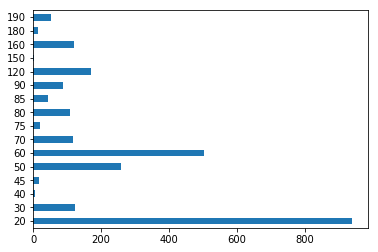

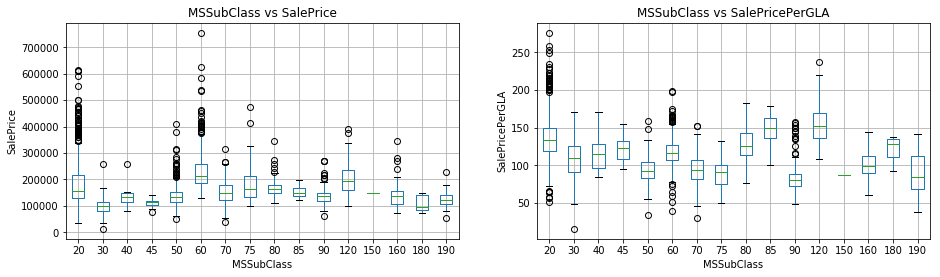

In [10]:
#0 MSSubClass
print("MSSubClass: Identifies the type of dwelling involved in the sale.")
print("20\t1-STORY 1946 & NEWER ALL STYLES")
print("30\t1-STORY 1945 & OLDER")
print("40\t1-STORY W/FINISHED ATTIC ALL AGES")
print("45\t1-1/2 STORY - UNFINISHED ALL AGES")
print("50\t1-1/2 STORY FINISHED ALL AGES")
print("60\t2-STORY 1946 & NEWER")
print("70\t2-STORY 1945 & OLDER")
print("75\t2-1/2 STORY ALL AGES")
print("80\tSPLIT OR MULTI-LEVEL")
print("85\tSPLIT FOYER")
print("90\tDUPLEX - ALL STYLES AND AGES")
print("120\t1-STORY PUD (Planned Unit Development) - 1946 & NEWER")
print("150\t1-1/2 STORY PUD - ALL AGES")
print("160\t2-STORY PUD - 1946 & NEWER")
print("180\tPUD - MULTILEVEL - INCL SPLIT LEV/FOYER")
print("190\t2 FAMILY CONVERSION - ALL STYLES AND AGES")

feature = cat_features[0]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()


MSZoning: Identifies the general zoning classification of the sale.
A	Agriculture
C	Commercial
FV	Floating Village Residential
I	Industrial
RH	Residential High Density
RL	Residential Low Density
RP	Residential Low Density Park
RM	Residential Medium Density
          MSZoning      SalePrice  SalePricePerGLA
MSZoning                                          
A (agr)          1   81500.000000        50.937500
C (all)         17   80700.647059        75.134335
FV             113  216343.053097       137.769813
I (all)          2   80312.500000        63.621097
RH              21  131639.714286        99.205207
RL            2007  187970.440458       124.920831
RM             418  127076.361244       100.469795


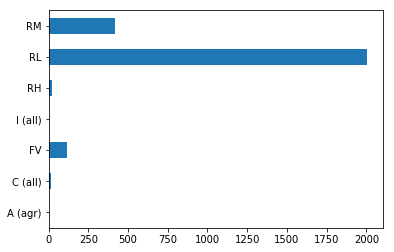

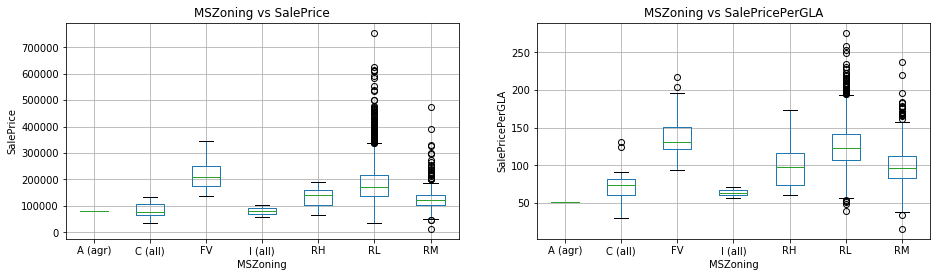

In [11]:
#1 MSZoning
print("MSZoning: Identifies the general zoning classification of the sale.")
print("A\tAgriculture")
print("C\tCommercial")
print("FV\tFloating Village Residential")
print("I\tIndustrial")
print("RH\tResidential High Density")
print("RL\tResidential Low Density")
print("RP\tResidential Low Density Park")
print("RM\tResidential Medium Density")

feature = cat_features[1]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()


Street: Type of road access to property
Grvl	Gravel
Pave	Paved
        Street      SalePrice  SalePricePerGLA
Street                                        
Grvl        10  117382.900000       110.619891
Pave      2569  178289.606462       120.947079


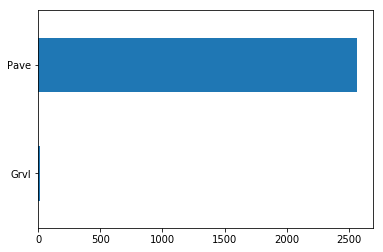

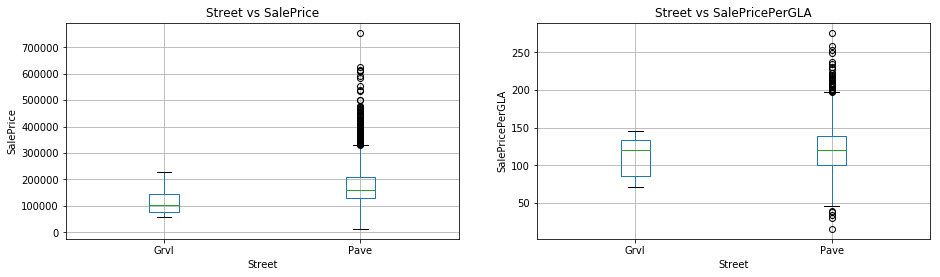

In [12]:
#2 Street
print("Street: Type of road access to property")
print("Grvl\tGravel")
print("Pave\tPaved")

feature = cat_features[2]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

Alley: Type of alley access to property
Grvl	Gravel
Pave	Paved
NA	No alley access
            Alley      SalePrice  SalePricePerGLA
Alley                                            
Grvl          105  126345.990476        90.667538
NoneListed   2411  180292.093737       122.264842
Pave           63  178559.698413       119.343142


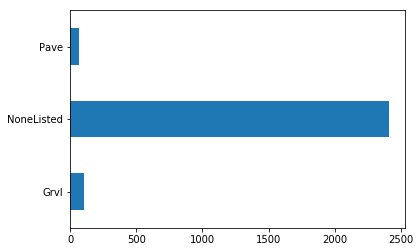

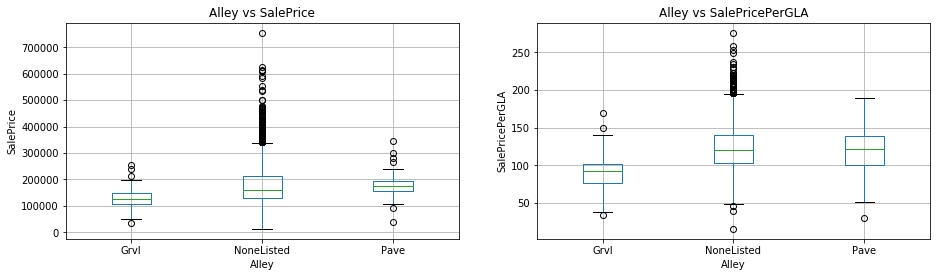

In [13]:
#3 Alley
print("Alley: Type of alley access to property")
print("Grvl\tGravel")
print("Pave\tPaved")
print("NA\tNo alley access")

feature = cat_features[3]
data[feature].replace(np.nan,"NoneListed").value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].replace(np.nan,"NoneListed").groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].replace(np.nan,"NoneListed").boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].replace(np.nan,"NoneListed").boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()


LotShape: General shape of property
Reg	Regular
IR1	Slightly irregular
IR2	Moderately Irregular
IR3	Irregular
          LotShape      SalePrice  SalePricePerGLA
LotShape                                          
IR1            855  206628.735673       130.386569
IR2             71  226790.633803       134.065804
IR3             13  209374.230769       112.254897
Reg           1640  160797.718902       115.463867


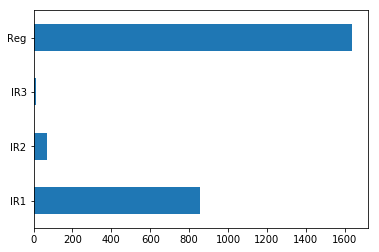

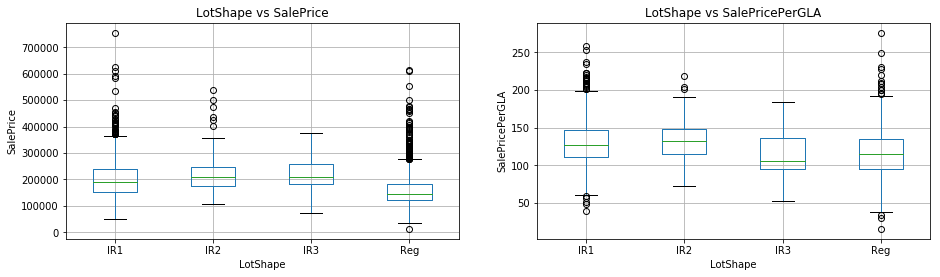

In [14]:
#4 LotShape
print("LotShape: General shape of property")
print("Reg\tRegular")
print("IR1\tSlightly irregular")
print("IR2\tModerately Irregular")
print("IR3\tIrregular")

feature = cat_features[4]
data[feature].replace(np.nan,"NoneListed").value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].replace(np.nan,"NoneListed").groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].replace(np.nan,"NoneListed").boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].replace(np.nan,"NoneListed").boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()


LandContour: Flatness of the property
Lvl	Near Flat/Level
Bnk	Banked - Quick and significant rise from street grade to building
HLS	Hillside - Significant slope from side to side
Low	Depression
             LandContour      SalePrice  SalePricePerGLA
LandContour                                             
Bnk                   95  150282.463158       101.748396
HLS                   95  239790.673684       143.884606
Low                   52  201157.692308       135.127440
Lvl                 2337  176158.613607       120.435380


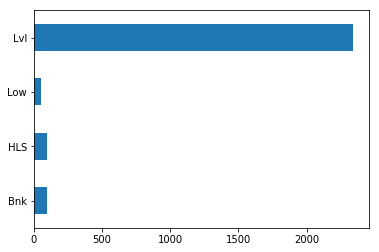

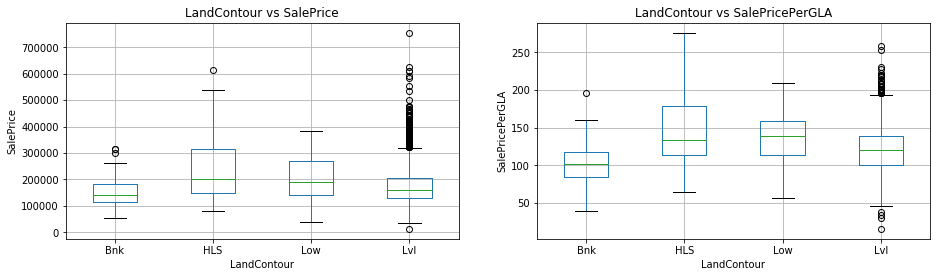

In [15]:
#5 LandContour
print("LandContour: Flatness of the property")
print("Lvl\tNear Flat/Level")
print("Bnk\tBanked - Quick and significant rise from street grade to building")
print("HLS\tHillside - Significant slope from side to side")
print("Low\tDepression")

feature = cat_features[5]
data[feature].replace(np.nan,"NoneListed").value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].replace(np.nan,"NoneListed").groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].replace(np.nan,"NoneListed").boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].replace(np.nan,"NoneListed").boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()


Utilities: Type of utilities available
AllPub	All public Utilities (E,G,W,& S)
NoSewr	Electricity, Gas, and Water (Septic Tank)
NoSeWa	Electricity and Gas Only
ELO	Electricity only
           Utilities     SalePrice  SalePricePerGLA
Utilities                                          
AllPub          2577  178124.64222       120.942989
NoSewr             2   86312.50000        74.580486


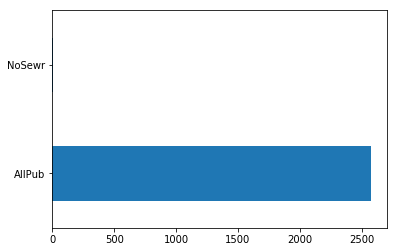

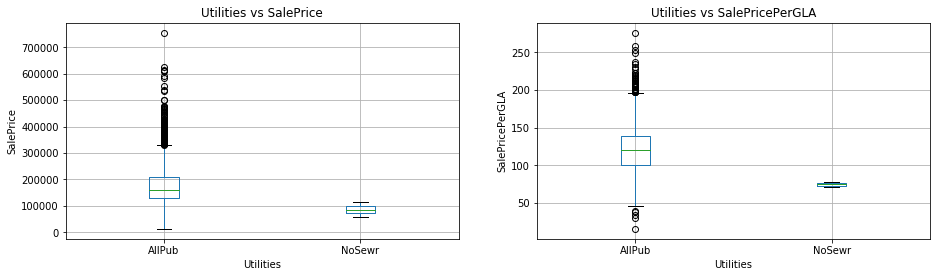

In [16]:
#6 Utilities
print("Utilities: Type of utilities available")
print("AllPub\tAll public Utilities (E,G,W,& S)")
print("NoSewr\tElectricity, Gas, and Water (Septic Tank)")
print("NoSeWa\tElectricity and Gas Only")
print("ELO\tElectricity only")

feature = cat_features[6]
data[feature].replace(np.nan,"NoneListed").value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].replace(np.nan,"NoneListed").groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].replace(np.nan,"NoneListed").boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].replace(np.nan,"NoneListed").boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()


LotConfig: Lot configuration
Inside	Inside lot
Corner	Corner lot
FR2	Frontage on 2 sides of property
FR3	Frontage on 3 sides of property
           LotConfig      SalePrice  SalePricePerGLA
LotConfig                                           
Corner           439  178015.701595       118.477762
CulDSac          164  219371.152439       135.068814
FR2               78  171979.358974       123.231376
FR3               13  189638.461538       130.731722
Inside          1885  174638.926260       120.076743


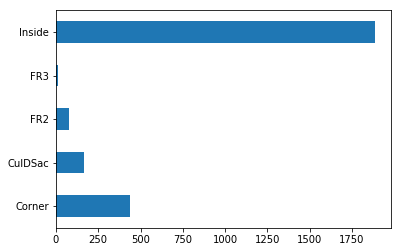

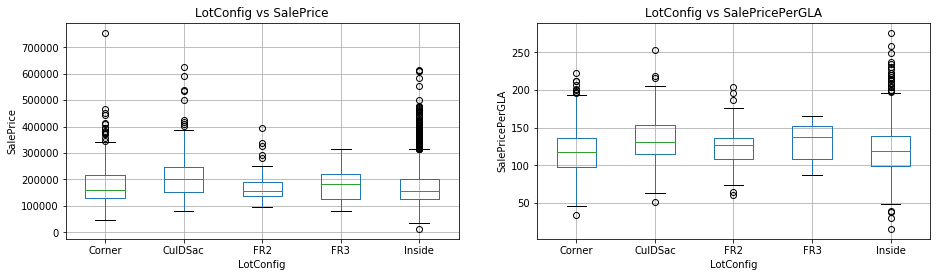

In [17]:
#7 LotConfig
print("LotConfig: Lot configuration")
print("Inside\tInside lot")
print("Corner\tCorner lot")
print("FR2\tFrontage on 2 sides of property")
print("FR3\tFrontage on 3 sides of property")

feature = cat_features[7]
data[feature].replace(np.nan,"NoneListed").value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].replace(np.nan,"NoneListed").groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].replace(np.nan,"NoneListed").boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].replace(np.nan,"NoneListed").boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()


LandSlope: Slope of property
Gtl	Gentle slope
Mod	Moderate Slope
Sev	Severe Slope
           LandSlope      SalePrice  SalePricePerGLA
LandSlope                                           
Gtl             2458  176745.739626       120.418662
Mod              108  203188.425926       130.387999
Sev               13  216496.153846       134.482320


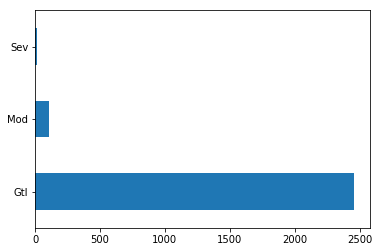

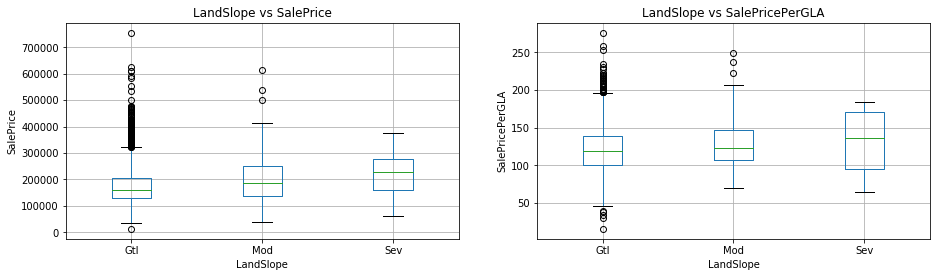

In [18]:
#8 LandSlope
print("LandSlope: Slope of property")
print("Gtl\tGentle slope")
print("Mod\tModerate Slope")
print("Sev\tSevere Slope")

feature = cat_features[8]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

Neighborhood: Physical locations within Ames city limits
Blmngtn	Bloomington Heights
Blueste	Bluestem
BrDale	Briardale
BrkSide	Brookside
ClearCr	Clear Creek
CollgCr	College Creek
Crawfor	Crawford
Edwards	Edwards
Gilbert	Gilbert
IDOTRR	Iowa DOT and Rail Road
MeadowV	Meadow Village
Mitchel	Mitchell
Names	North Ames
NoRidge	Northridge
NPkVill	Northpark Villa
NridgHt	Northridge Heights
NWAmes	Northwest Ames
OldTown	Old Town
SWISU	South & West of Iowa State University
Sawyer	Sawyer
SawyerW	Sawyer West
Somerst	Somerset
StoneBr	Stone Brook
Timber	Timberland
Veenker	Veenker
              Neighborhood      SalePrice  SalePricePerGLA
Neighborhood                                              
Blmngtn                 23  196237.173913       138.681141
Blueste                 10  143590.000000       126.218703
BrDale                  29  106094.827586        96.012460
BrkSide                103  126029.854369       103.950446
ClearCr                 40  213980.800000       125.208479
CollgCr       

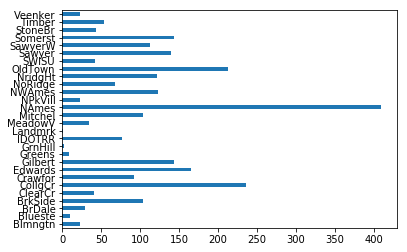

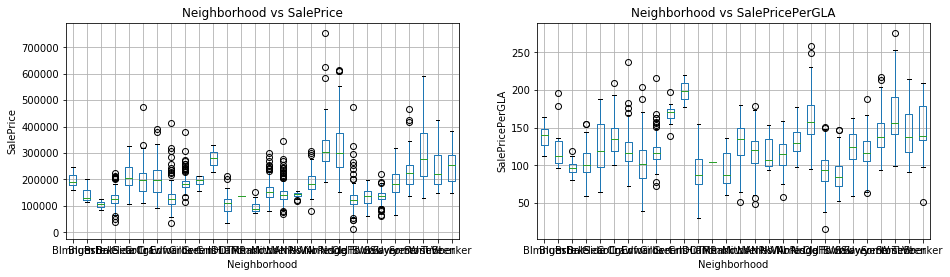

In [19]:
#9 Neighborhood
print("Neighborhood: Physical locations within Ames city limits")
print("Blmngtn\tBloomington Heights")
print("Blueste\tBluestem")
print("BrDale\tBriardale")
print("BrkSide\tBrookside")
print("ClearCr\tClear Creek")
print("CollgCr\tCollege Creek")
print("Crawfor\tCrawford")
print("Edwards\tEdwards")
print("Gilbert\tGilbert")
print("IDOTRR\tIowa DOT and Rail Road")
print("MeadowV\tMeadow Village")
print("Mitchel\tMitchell")
print("Names\tNorth Ames")
print("NoRidge\tNorthridge")
print("NPkVill\tNorthpark Villa")
print("NridgHt\tNorthridge Heights")
print("NWAmes\tNorthwest Ames")
print("OldTown\tOld Town")
print("SWISU\tSouth & West of Iowa State University")
print("Sawyer\tSawyer")
print("SawyerW\tSawyer West")
print("Somerst\tSomerset")
print("StoneBr\tStone Brook")
print("Timber\tTimberland")
print("Veenker\tVeenker")

feature = cat_features[9]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

Condition1: Proximity to various conditions
Artery	Adjacent to arterial street
Feedr	Adjacent to feeder street
Norm	Normal
RRNn	Within 200' of North-South Railroad
RRAn	Adjacent to North-South Railroad
PosN	Near positive off-site feature--park, greenbelt, etc.
PosA	Adjacent to postive off-site feature
RRNe	Within 200' of East-West Railroad
RRAe	Adjacent to East-West Railroad
            Condition1      SalePrice  SalePricePerGLA
Condition1                                            
Artery              81  129891.975309        91.730548
Feedr              137  141343.802920       105.147478
Norm              2227  180956.537045       122.903755
PosA                19  246650.000000       124.558120
PosN                37  237920.459459       128.846897
RRAe                26  138650.000000       119.723390
RRAn                40  177734.050000       116.770483
RRNe                 4  150337.500000       117.782814
RRNn                 8  189906.250000       111.063180


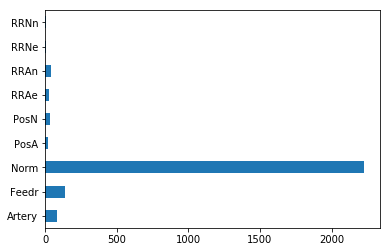

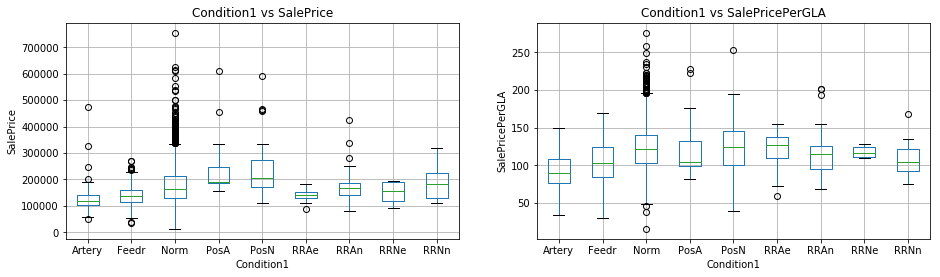

In [20]:
#10 Condition1
#print("")
print("Condition1: Proximity to various conditions")
print("Artery\tAdjacent to arterial street")
print("Feedr\tAdjacent to feeder street")
print("Norm\tNormal")
print("RRNn\tWithin 200' of North-South Railroad")
print("RRAn\tAdjacent to North-South Railroad")
print("PosN\tNear positive off-site feature--park, greenbelt, etc.")
print("PosA\tAdjacent to postive off-site feature")
print("RRNe\tWithin 200' of East-West Railroad")
print("RRAe\tAdjacent to East-West Railroad")
feature = cat_features[10]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

Condition2: Proximity to various conditions (if more than one is present)
Artery	Adjacent to arterial street
Feedr	Adjacent to feeder street	
Norm	Normal	
RRNn	Within 200' of North-South Railroad
RRAn	Adjacent to North-South Railroad
PosN	Near positive off-site feature--park, greenbelt, etc.
PosA	Adjacent to postive off-site feature
RRNe	Within 200' of East-West Railroad
RRAe	Adjacent to East-West Railroad
            Condition2      SalePrice  SalePricePerGLA
Condition2                                            
Artery               3  130750.000000       110.878686
Feedr               12  132741.666667        94.323322
Norm              2554  177884.699687       120.957959
PosA                 3  463333.333333       189.353515
PosN                 3  328916.666667       140.927903
RRAe                 1  190000.000000        72.519084
RRAn                 1  136905.000000        81.491071
RRNn                 2   96750.000000       141.622960


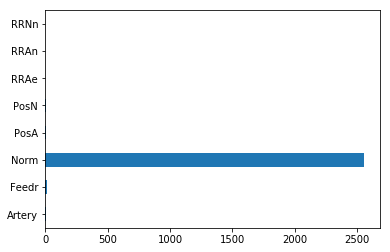

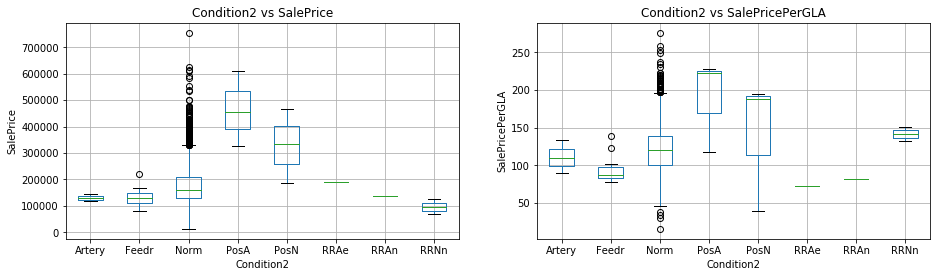

In [21]:
#11 Condition2
#print("\t\n")
print("Condition2: Proximity to various conditions (if more than one is present)")
print("Artery	Adjacent to arterial street")
print("Feedr	Adjacent to feeder street	")
print("Norm	Normal	")
print("RRNn	Within 200' of North-South Railroad")
print("RRAn	Adjacent to North-South Railroad")
print("PosN	Near positive off-site feature--park, greenbelt, etc.")
print("PosA	Adjacent to postive off-site feature")
print("RRNe	Within 200' of East-West Railroad")
print("RRAe	Adjacent to East-West Railroad")

feature = cat_features[11]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

BldgType: Type of dwelling
1Fam	Single-family Detached
2FmCon	Two-family Conversion; originally built as one-family dwelling
Duplx	Duplex
TwnhsE	Townhouse End Unit
TwnhsI	Townhouse Inside Unit
          BldgType      SalePrice  SalePricePerGLA
BldgType                                          
1Fam          2138  181849.243218       121.618122
2fmCon          54  125428.240741        90.439322
Duplex          87  141175.494253        87.391424
Twnhs           98  137329.489796       110.263671
TwnhsE         202  187586.450495       141.124166


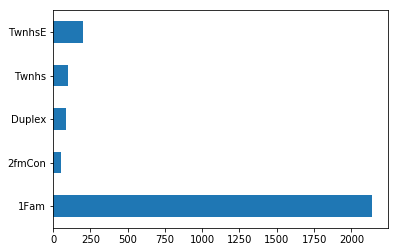

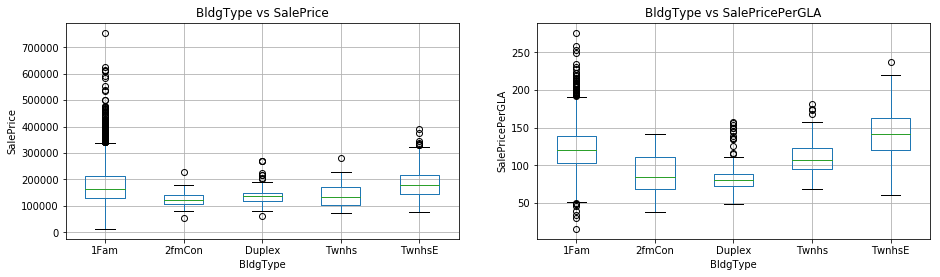

In [22]:
#12 BldgType
print("BldgType: Type of dwelling")
print("1Fam\tSingle-family Detached")
print("2FmCon\tTwo-family Conversion; originally built as one-family dwelling")
print("Duplx\tDuplex")
print("TwnhsE\tTownhouse End Unit")
print("TwnhsI\tTownhouse Inside Unit")

feature = cat_features[12]
data[feature].replace(np.nan,"NoneListed").value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].replace(np.nan,"NoneListed").groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].replace(np.nan,"NoneListed").boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].replace(np.nan,"NoneListed").boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

HouseStyle: Style of dwelling
1Story	One story
1.5Fin	One and one-half story: 2nd level finished
1.5Unf	One and one-half story: 2nd level unfinished
2Story	Two story
2.5Fin	Two and one-half story: 2nd level finished
2.5Unf	Two and one-half story: 2nd level unfinished
SFoyer	Split Foyer
SLvl	Split Level
            HouseStyle      SalePrice  SalePricePerGLA
HouseStyle                                            
1.5Fin             283  140640.402827        92.808173
1.5Unf              19  109663.157895       120.620793
1Story            1288  175867.945652       133.395757
2.5Fin               6  242666.666667        81.634854
2.5Unf              22  178313.636364        86.644566
2Story             773  201392.412678       108.931155
SFoyer              70  143980.142857       142.992067
SLvl               118  166637.584746       125.760882


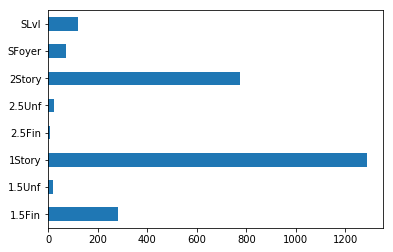

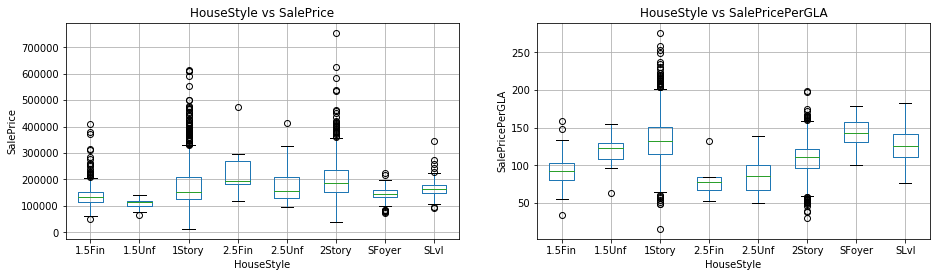

In [23]:
#13 HouseStyle
print("HouseStyle: Style of dwelling")
print("1Story\tOne story")
print("1.5Fin\tOne and one-half story: 2nd level finished")
print("1.5Unf\tOne and one-half story: 2nd level unfinished")
print("2Story\tTwo story")
print("2.5Fin\tTwo and one-half story: 2nd level finished")
print("2.5Unf\tTwo and one-half story: 2nd level unfinished")
print("SFoyer\tSplit Foyer")
print("SLvl\tSplit Level")

feature = cat_features[13]
data[feature].replace(np.nan,"NoneListed").value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].replace(np.nan,"NoneListed").groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].replace(np.nan,"NoneListed").boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].replace(np.nan,"NoneListed").boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

OverallQual: Rates the overall material and finish of the house
10	Very Excellent
9	Excellent
8	Very Good
7	Good
6	Above Average
5	Average
4	Below Average
3	Fair
2	Poor
1	Very Poor
             OverallQual      SalePrice  SalePricePerGLA
OverallQual                                             
1                      3   60600.000000        78.693349
2                     13   52325.307692        85.271842
3                     32   86526.562500        89.182366
4                    195  107910.994872        99.104713
5                    752  135944.208777       113.771640
6                    669  162635.550075       115.386759
7                    525  204691.163810       124.360315
8                    290  268912.641379       146.037687
9                     80  359806.600000       178.669626
10                    20  463051.100000       180.584766


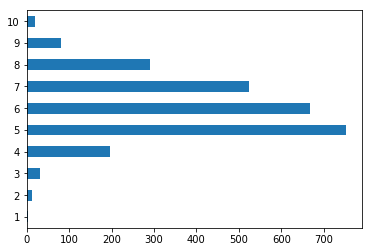

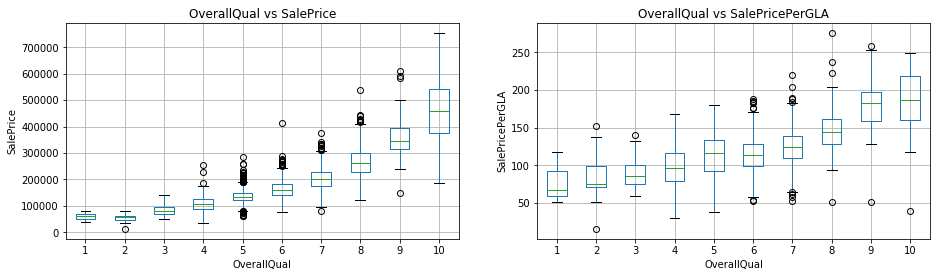

In [24]:
#14 OverallQual
print("OverallQual: Rates the overall material and finish of the house")
print("10\tVery Excellent")
print("9\tExcellent")
print("8\tVery Good")
print("7\tGood")
print("6\tAbove Average")
print("5\tAverage")
print("4\tBelow Average")
print("3\tFair")
print("2\tPoor")
print("1\tVery Poor")

feature = cat_features[14]
data[feature].replace(np.nan,"NoneListed").value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].replace(np.nan,"NoneListed").groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].replace(np.nan,"NoneListed").boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].replace(np.nan,"NoneListed").boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

OverallCond: Rates the overall condition of the house
10	Very Excellent
9	Excellent
8	Very Good
7	Good
6	Above Average
5	Average
4	Below Average
3	Fair
2	Poor
1	Very Poor
             OverallCond      SalePrice  SalePricePerGLA
OverallCond                                             
1                      4   67250.000000        51.978846
2                      8  126077.625000        79.468204
3                     39   94563.487179        78.278637
4                     88  118456.943182        88.108756
5                   1402  202167.333809       127.789395
6                    497  150734.476861       114.631051
7                    360  154255.022222       117.773127
8                    140  155244.107143       119.010414
9                     41  199765.853659       121.390199


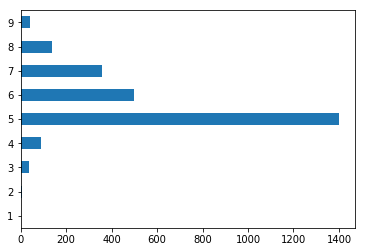

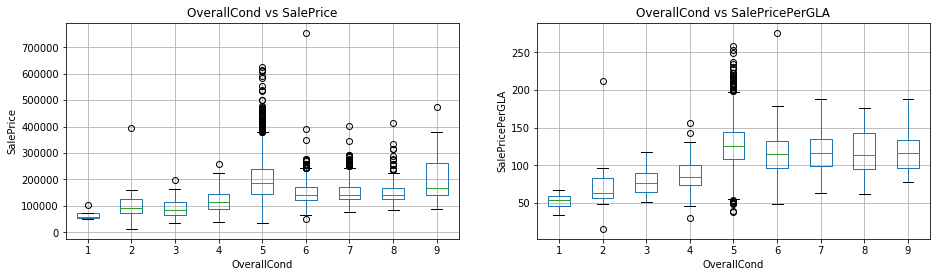

In [25]:
#15 OverallCond
print("OverallCond: Rates the overall condition of the house")
print("10\tVery Excellent")
print("9\tExcellent")
print("8\tVery Good")
print("7\tGood")
print("6\tAbove Average")
print("5\tAverage")
print("4\tBelow Average")
print("3\tFair")
print("2\tPoor")
print("1\tVery Poor")

feature = cat_features[15]
data[feature].replace(np.nan,"NoneListed").value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].replace(np.nan,"NoneListed").groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].replace(np.nan,"NoneListed").boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].replace(np.nan,"NoneListed").boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

RoofStyle: Type of roof
Flat	Flat
Gable	Gable
Gambrel	Gabrel (Barn)
Hip	Hip
Mansard	Mansard
Shed	Shed
           RoofStyle      SalePrice  SalePricePerGLA
RoofStyle                                           
Flat              16  188843.750000       129.217675
Gable           2058  169510.451895       118.312813
Gambrel           18  144355.555556        92.704007
Hip              473  215765.198732       133.532028
Mansard           10  178447.900000        88.516090
Shed               4  221500.000000       137.377584


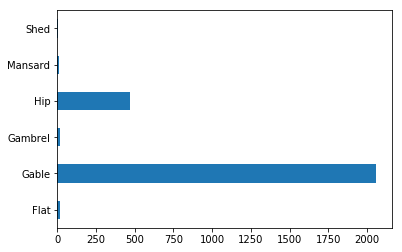

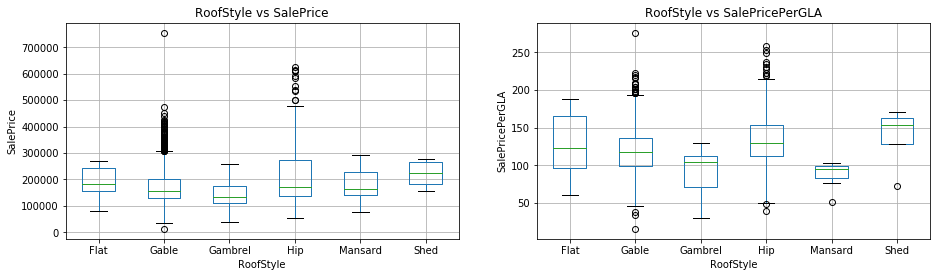

In [26]:
#16 RoofStyle
print("RoofStyle: Type of roof")
print("Flat\tFlat")
print("Gable\tGable")
print("Gambrel\tGabrel (Barn)")
print("Hip\tHip")
print("Mansard\tMansard")
print("Shed\tShed")

feature = cat_features[16]
data[feature].replace(np.nan,"NoneListed").value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].replace(np.nan,"NoneListed").groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].replace(np.nan,"NoneListed").boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].replace(np.nan,"NoneListed").boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

RoofMatl: Roof material
ClyTile	Clay or Tile
CompShg	Standard (Composite) Shingle
Membran	Membrane
Metal	Metal
Roll	Roll
Tar&Grv	Gravel & Tar
WdShake	Wood Shakes
WdShngl	Wood Shingles
          RoofMatl      SalePrice  SalePricePerGLA
RoofMatl                                          
CompShg       2543  177282.276052       120.825871
Membran          1  241500.000000       177.182685
Metal            1  180000.000000       182.186235
Roll             1  137000.000000        71.354167
Tar&Grv         18  185166.666667       118.771895
WdShake          8  232375.000000       112.145949
WdShngl          7  374357.142857       156.181288


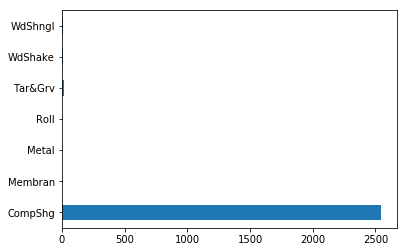

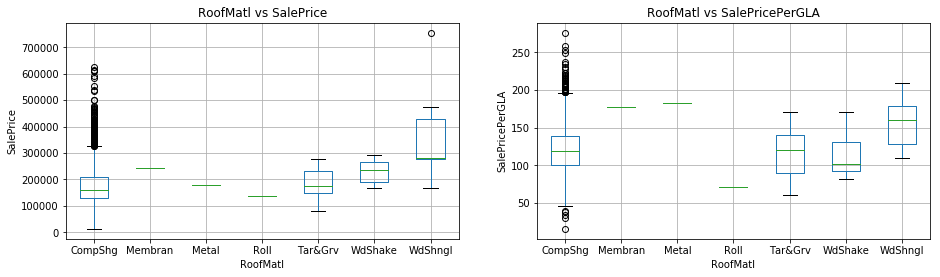

In [27]:
#17 RoofMatl
#print("")
print("RoofMatl: Roof material")
print("ClyTile	Clay or Tile")
print("CompShg	Standard (Composite) Shingle")
print("Membran	Membrane")
print("Metal	Metal")
print("Roll	Roll")
print("Tar&Grv	Gravel & Tar")
print("WdShake	Wood Shakes")
print("WdShngl	Wood Shingles")

feature = cat_features[17]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

Exterior1st: Exterior covering on house
AsbShng	Asbestos Shingles
AsphShn	Asphalt Shingles
BrkComm	Brick Common
BrkFace	Brick Face
CBlock	Cinder Block
CemntBd	Cement Board
HdBoard	Hard Board
ImStucc	Imitation Stucco
MetalSd	Metal Siding
Other	Other
Plywood	Plywood
PreCast	PreCast
Stone	Stone
Stucco	Stucco
VinylSd	Vinyl Siding
Wd Sdng	Wood Siding
WdShing	Wood Shingles
             Exterior1st      SalePrice  SalePricePerGLA
Exterior1st                                             
AsbShng               34  106998.529412        81.279321
AsphShn                2   91187.500000        60.693538
BrkComm                5  153000.000000       100.381838
BrkFace               80  188901.875000       121.449059
CBlock                 2   93250.000000        63.678357
CemntBd               97  213163.556701       130.968163
HdBoard              416  162253.906250       120.339943
ImStucc                1  262000.000000       161.330049
MetalSd              407  152843.665848       113.918404
Ply

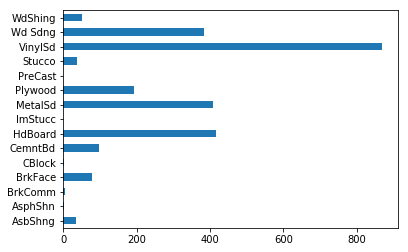

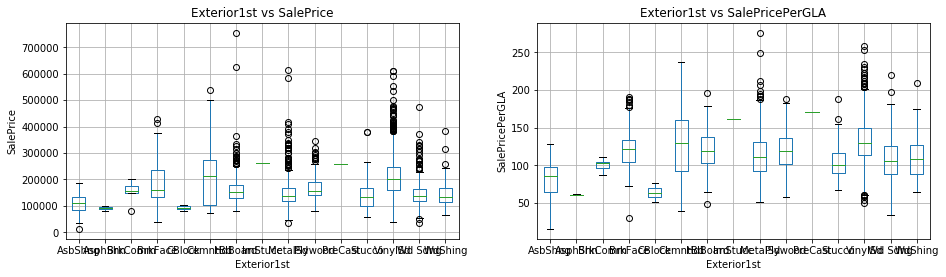

In [28]:
# 18      Exterior1st
# Exterior1st
print("Exterior1st: Exterior covering on house")
print("AsbShng	Asbestos Shingles")
print("AsphShn	Asphalt Shingles")
print("BrkComm	Brick Common")
print("BrkFace	Brick Face")
print("CBlock	Cinder Block")
print("CemntBd	Cement Board")
print("HdBoard	Hard Board")
print("ImStucc	Imitation Stucco")
print("MetalSd	Metal Siding")
print("Other	Other")
print("Plywood	Plywood")
print("PreCast	PreCast")
print("Stone	Stone")
print("Stucco	Stucco")
print("VinylSd	Vinyl Siding")
print("Wd Sdng	Wood Siding")
print("WdShing	Wood Shingles")

feature = cat_features[18]
data[feature].replace(np.nan,"NoneListed").value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].replace(np.nan,"NoneListed").groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].replace(np.nan,"NoneListed").boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].replace(np.nan,"NoneListed").boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

Exterior2nd: Exterior covering on house (if more than one material)
AsbShng	Asbestos Shingles
AsphShn	Asphalt Shingles
BrkComm	Brick Common
BrkFace	Brick Face
CBlock	Cinder Block
CemntBd	Cement Board
HdBoard	Hard Board
ImStucc	Imitation Stucco
MetalSd	Metal Siding
Other	Other
Plywood	Plywood
PreCast	PreCast
Stone	Stone
Stucco	Stucco
VinylSd	Vinyl Siding
Wd Sdng	Wood Siding
WdShing	Wood Shingles
             Exterior2nd      SalePrice  SalePricePerGLA
Exterior2nd                                             
AsbShng               31  107985.483871        81.171773
AsphShn                4  124093.750000        86.781706
Brk Cmn               21  141228.571429       109.979757
BrkFace               46  189642.391304       123.815345
CBlock                 3  114666.666667        74.988738
CmentBd               97  211725.412371       131.109398
HdBoard              380  162954.934211       119.777397
ImStucc               13  230323.076923       131.152925
MetalSd              404  154470

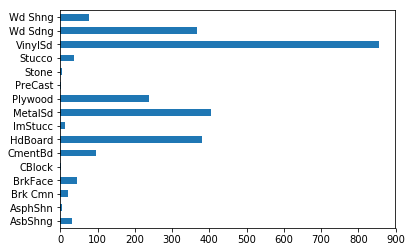

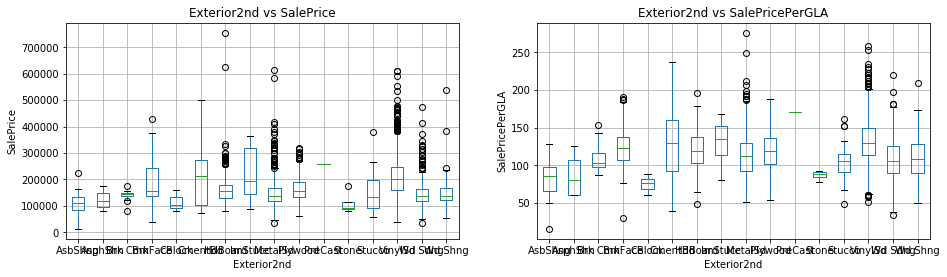

In [29]:
# 19      Exterior2nd
# Exterior2nd
print("Exterior2nd: Exterior covering on house (if more than one material)")
print("AsbShng	Asbestos Shingles")
print("AsphShn	Asphalt Shingles")
print("BrkComm	Brick Common")
print("BrkFace	Brick Face")
print("CBlock	Cinder Block")
print("CemntBd	Cement Board")
print("HdBoard	Hard Board")
print("ImStucc	Imitation Stucco")
print("MetalSd	Metal Siding")
print("Other	Other")
print("Plywood	Plywood")
print("PreCast	PreCast")
print("Stone	Stone")
print("Stucco	Stucco")
print("VinylSd	Vinyl Siding")
print("Wd Sdng	Wood Siding")
print("WdShing	Wood Shingles")
feature = cat_features[19]
data[feature].replace(np.nan,"NoneListed").value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].replace(np.nan,"NoneListed").groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].replace(np.nan,"NoneListed").boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].replace(np.nan,"NoneListed").boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

MasVnrType: Masonry veneer type
BrkCmn	Brick Common
BrkFace	Brick Face
CBlock	Cinder Block
None	None
Stone	Stone
            MasVnrType      SalePrice  SalePricePerGLA
MasVnrType                                            
BrkCmn              20  145450.200000       108.194417
BrkFace            804  208615.353234       127.537679
None              1558  154339.878049       114.529189
Stone              183  246845.519126       146.372051


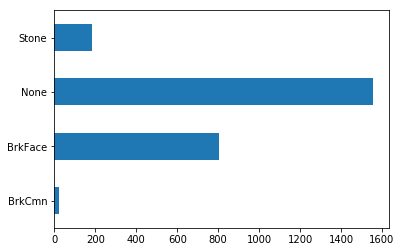

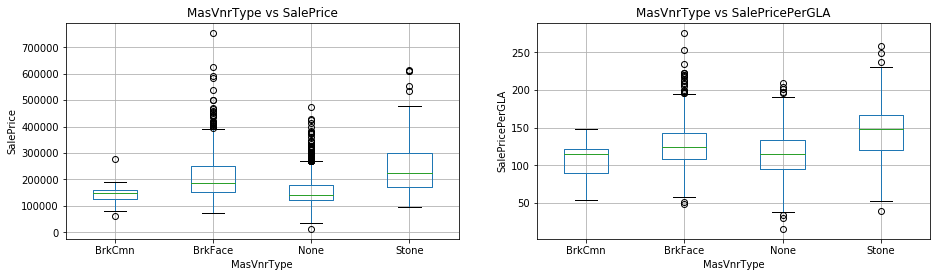

In [30]:
#20       MasVnrType
print("MasVnrType: Masonry veneer type")
print("BrkCmn	Brick Common")
print("BrkFace	Brick Face")
print("CBlock	Cinder Block")
print("None	None")
print("Stone	Stone")
#print("")
feature = cat_features[20]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

ExterQual: Evaluates the quality of the material on the exterior
Ex	Excellent
Gd	Good
TA	Average/Typical
Fa	Fair
Po	Poor
           ExterQual      SalePrice  SalePricePerGLA
ExterQual                                           
Ex                73  378142.164384       182.255219
Fa                30   91436.666667        82.517365
Gd               841  228130.010702       134.853605
TA              1635  144951.077064       111.698600


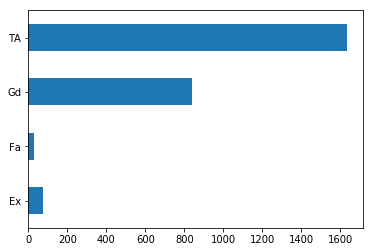

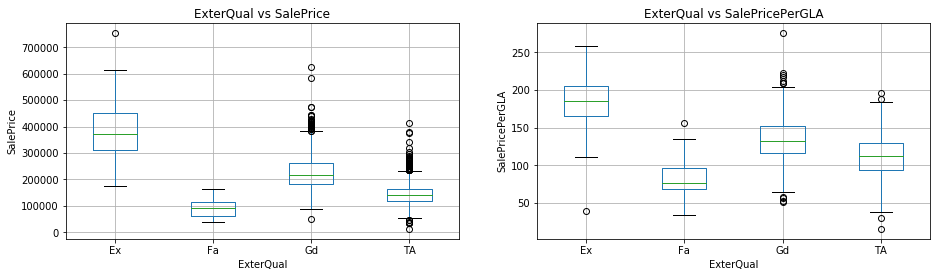

In [31]:
#21        ExterQual
print("ExterQual: Evaluates the quality of the material on the exterior")
print("Ex	Excellent")
print("Gd	Good")
print("TA	Average/Typical")
print("Fa	Fair")
print("Po	Poor")
#print("")
feature = cat_features[21]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

ExterCond: Evaluates the present condition of the material on the exterior
Ex	Excellent
Gd	Good
TA	Average/Typical
Fa	Fair
Po	Poor
           ExterCond      SalePrice  SalePricePerGLA
ExterCond                                           
Ex                11  195913.636364       129.343992
Fa                56  112343.553571        84.039074
Gd               279  165535.322581       117.524921
Po                 2  117750.000000        61.977047
TA              2231  181234.282385       122.266636


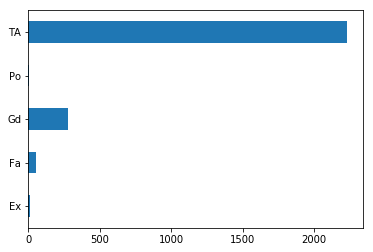

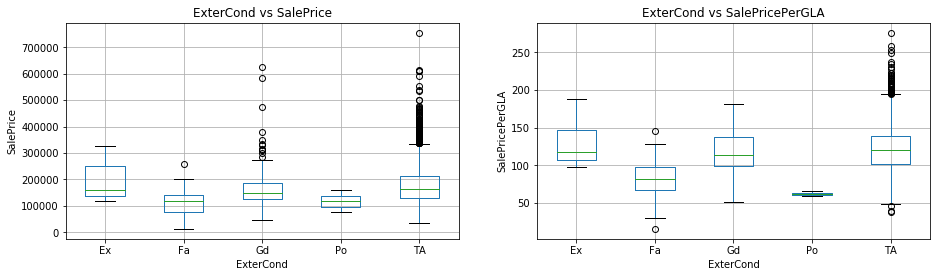

In [32]:
#22 ExterCond
#print("")
print("ExterCond: Evaluates the present condition of the material on the exterior")
print("Ex	Excellent")
print("Gd	Good")
print("TA	Average/Typical")
print("Fa	Fair")
print("Po	Poor")

feature = cat_features[22]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

Foundation: Type of foundation
BrkTil	Brick & Tile
CBlock	Cinder Block
PConc	Poured Contrete	
Slab	Slab
Stone	Stone
Wood	Wood
            Foundation      SalePrice  SalePricePerGLA
Foundation                                            
BrkTil             278  130371.266187        96.339057
CBlock            1139  149600.281826       116.206744
PConc             1105  222066.301357       133.579585
Slab                42  112601.261905        86.128217
Stone               10  154487.900000        87.693101
Wood                 5  180900.000000       115.549577


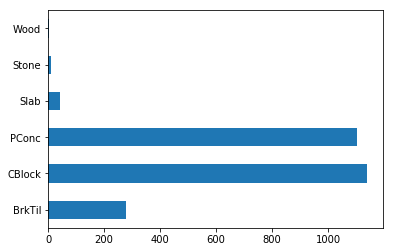

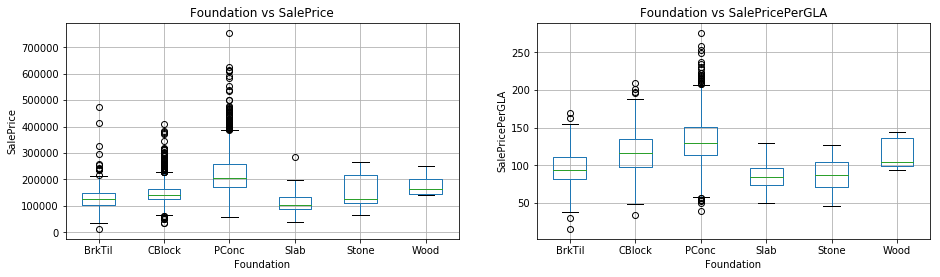

In [33]:
#23       Foundation
print("Foundation: Type of foundation")
print("BrkTil	Brick & Tile")
print("CBlock	Cinder Block")
print("PConc	Poured Contrete	")
print("Slab	Slab")
print("Stone	Stone")
print("Wood	Wood")
#print("")
feature = cat_features[23]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

BsmtQual: Evaluates the height of the basement
Ex	Excellent (100+ inches)	
Gd	Good (90-99 inches)
TA	Typical (80-89 inches)
Fa	Fair (70-79 inches)
Po	Poor (<70 inches
NA	No Basement
          BsmtQual      SalePrice  SalePricePerGLA
BsmtQual                                          
Ex             188  327308.005319       165.398422
Fa              78  113467.051282        94.127835
Gd            1076  200967.554833       129.002372
Po               2   84950.000000        71.257080
TA            1166  141389.656947       110.140153


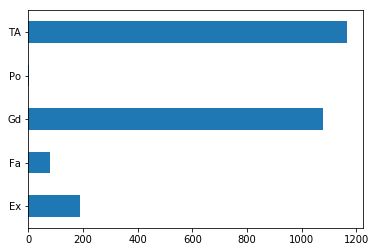

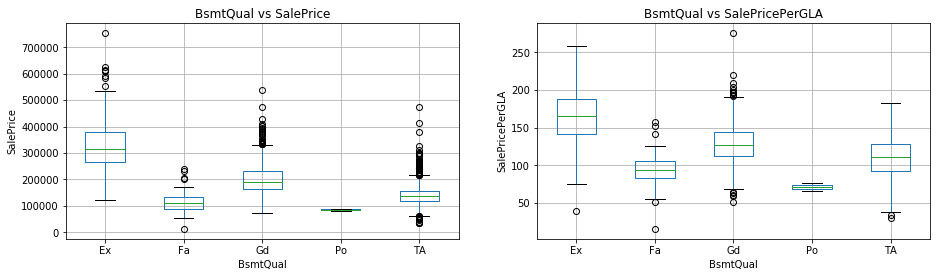

In [35]:
#24         BsmtQual
print("BsmtQual: Evaluates the height of the basement")
print("Ex	Excellent (100+ inches)	")
print("Gd	Good (90-99 inches)")
print("TA	Typical (80-89 inches)")
print("Fa	Fair (70-79 inches)")
print("Po	Poor (<70 inches")
print("NA	No Basement")

#print("")
feature = cat_features[24]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

BsmtCond: Evaluates the general condition of the basement
Ex	Excellent
Gd	Good
TA	Typical - slight dampness allowed
Fa	Fair - dampness or some cracking or settling
Po	Poor - Severe cracking, settling, or wetness
NA	No Basement
          BsmtCond      SalePrice  SalePricePerGLA
BsmtCond                                          
Ex               3  195000.000000       150.636221
Fa              88  122382.875000        89.776422
Gd             101  206709.128713       132.476678
Po               3   95133.333333        68.056128
TA            2315  181053.109719       122.623245


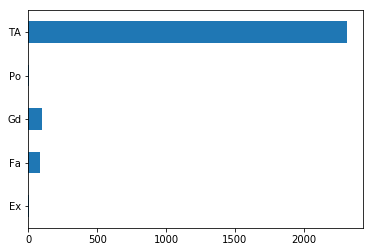

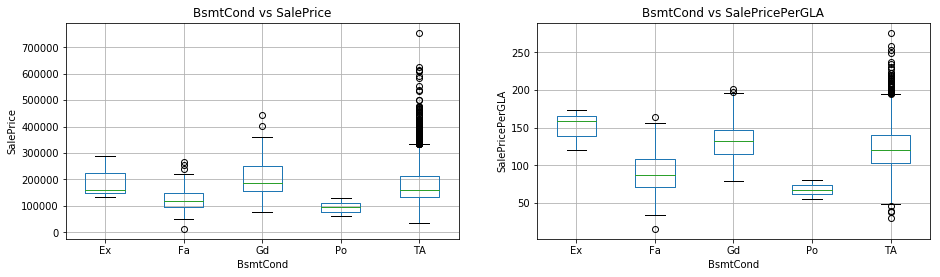

In [36]:
#25         BsmtCond
print("BsmtCond: Evaluates the general condition of the basement")
print("Ex	Excellent")
print("Gd	Good")
print("TA	Typical - slight dampness allowed")
print("Fa	Fair - dampness or some cracking or settling")
print("Po	Poor - Severe cracking, settling, or wetness")
print("NA	No Basement")
#print("")
feature = cat_features[25]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

BsmtExposure: Refers to walkout or garden level walls
Gd	Good Exposure
Av	Average Exposure (split levels or foyers typically score average or above)	
Mn	Mimimum Exposure
No	No Exposure
NA	No Basement
              BsmtExposure      SalePrice  SalePricePerGLA
BsmtExposure                                              
Av                     344  201482.340116       140.694396
Gd                     242  262873.061983       153.226638
Mn                     214  185423.439252       118.516226
No                    1708  163135.738876       114.004629


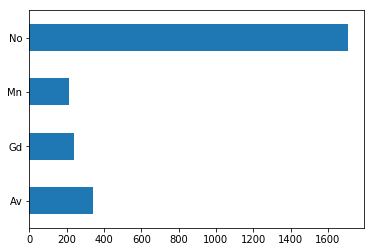

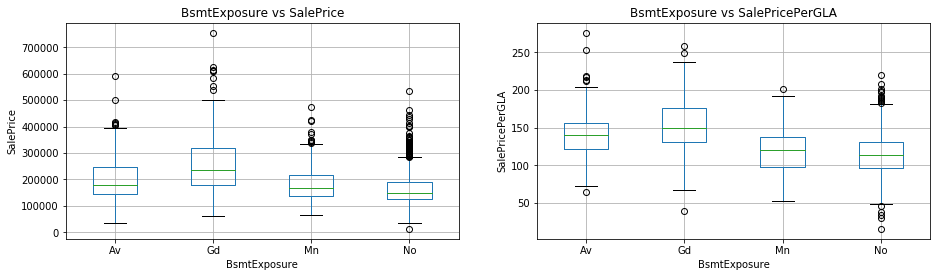

In [37]:
#26     BsmtExposure
print("BsmtExposure: Refers to walkout or garden level walls")
print("Gd	Good Exposure")
print("Av	Average Exposure (split levels or foyers typically score average or above)	")
print("Mn	Mimimum Exposure")
print("No	No Exposure")
print("NA	No Basement")
#print("")
feature = cat_features[26]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

BsmtFinType1: Rating of basement finished area
GLQ	Good Living Quarters
ALQ	Average Living Quarters
BLQ	Below Average Living Quarters	
Rec	Average Rec Room
LwQ	Low Quality
Unf	Unfinshed
NA	No Basement
              BsmtFinType1      SalePrice  SalePricePerGLA
BsmtFinType1                                              
ALQ                    397  163515.198992       124.102467
BLQ                    250  150680.160000       116.091827
GLQ                    753  231889.369190       143.455877
LwQ                    139  153106.834532       107.783776
Rec                    265  144782.030189       109.105979
Unf                    706  162617.998584       107.082745


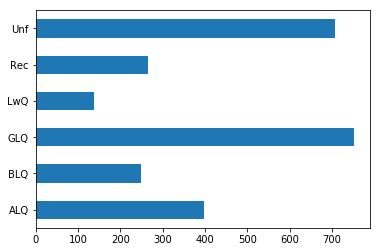

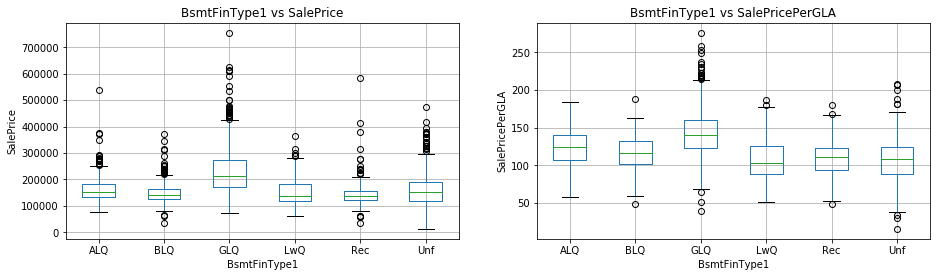

In [38]:
#27     BsmtFinType1
print("BsmtFinType1: Rating of basement finished area")
print("GLQ	Good Living Quarters")
print("ALQ	Average Living Quarters")
print("BLQ	Below Average Living Quarters	")
print("Rec	Average Rec Room")
print("LwQ	Low Quality")
print("Unf	Unfinshed")
print("NA	No Basement")
#print("")
feature = cat_features[27]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

BsmtFinType2: Rating of basement finished area (if multiple types)
GLQ	Good Living Quarters
ALQ	Average Living Quarters
BLQ	Below Average Living Quarters	
Rec	Average Rec Room
LwQ	Low Quality
Unf	Unfinshed
NA	No Basement
              BsmtFinType2      SalePrice  SalePricePerGLA
BsmtFinType2                                              
ALQ                     53  188644.339623       134.012955
BLQ                     64  161466.140625       121.914004
GLQ                     32  211278.125000       137.985798
LwQ                     84  160725.297619       121.082267
Rec                     97  164338.402062       120.432344
Unf                   2179  181201.023864       121.368262


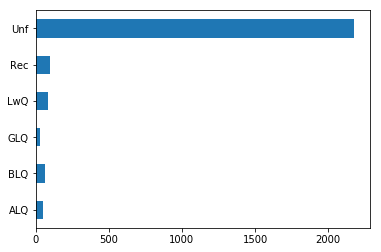

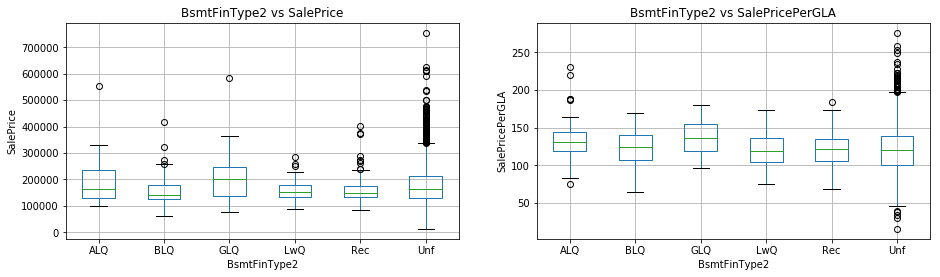

In [39]:
#28     BsmtFinType2
print("BsmtFinType2: Rating of basement finished area (if multiple types)")
print("GLQ	Good Living Quarters")
print("ALQ	Average Living Quarters")
print("BLQ	Below Average Living Quarters	")
print("Rec	Average Rec Room")
print("LwQ	Low Quality")
print("Unf	Unfinshed")
print("NA	No Basement")
#print("")
feature = cat_features[28]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

Heating: Type of heating
Floor	Floor Furnace
GasA	Gas forced warm air furnace
GasW	Gas hot water or steam heat
Grav	Gravity furnace	
OthW	Hot water or steam heat other than gas
Wall	Wall furnace
         Heating      SalePrice  SalePricePerGLA
Heating                                         
Floor          1   72500.000000       100.694444
GasA        2539  178701.515951       121.364117
GasW          25  162555.160000        97.653357
Grav           7   91285.714286        88.099412
OthW           2  125750.000000        57.331966
Wall           5   89960.000000        80.472682


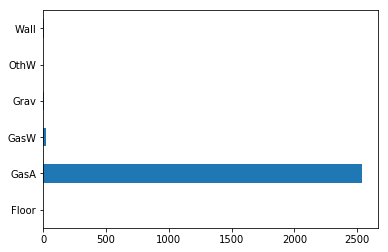

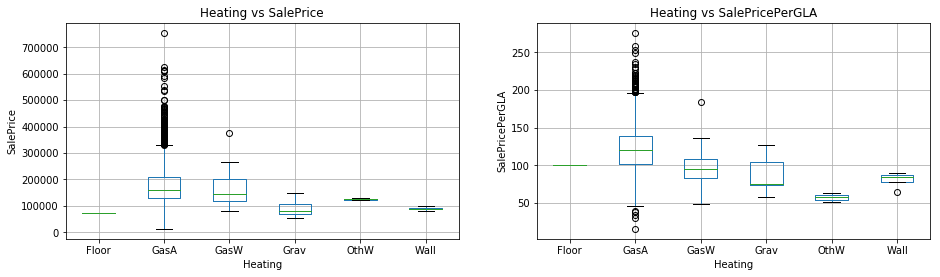

In [40]:
#29 Heating
#print("")
print("Heating: Type of heating")
print("Floor	Floor Furnace")
print("GasA	Gas forced warm air furnace")
print("GasW	Gas hot water or steam heat")
print("Grav	Gravity furnace	")
print("OthW	Hot water or steam heat other than gas")
print("Wall	Wall furnace")

feature = cat_features[29]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

HeatingQC: Heating quality and condition
Ex	Excellent
Gd	Good
TA	Average/Typical
Fa	Fair
Po	Poor
           HeatingQC      SalePrice  SalePricePerGLA
HeatingQC                                           
Ex              1293  211115.116009       130.807064
Fa                84  125540.738095        97.536680
Gd               434  156307.688940       113.892566
Po                 1   87000.000000       108.343711
TA               767  140492.860495       110.762597


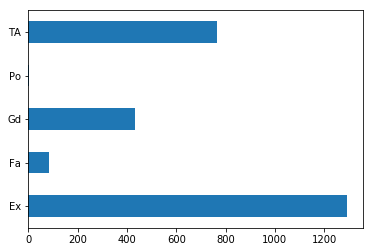

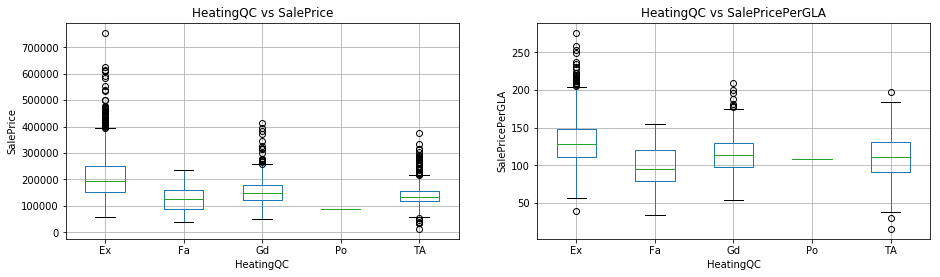

In [42]:
#30        HeatingQC
print("HeatingQC: Heating quality and condition")
print("Ex	Excellent")
print("Gd	Good")
print("TA	Average/Typical")
print("Fa	Fair")
print("Po	Poor")
#print("")
feature = cat_features[30]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

CentralAir: Central air conditioning
N	No
Y	Yes
            CentralAir      SalePrice  SalePricePerGLA
CentralAir                                            
N                  163  103607.257669        86.714677
Y                 2416  183076.094785       123.213887


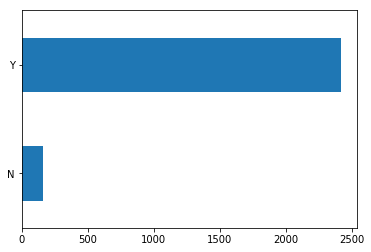

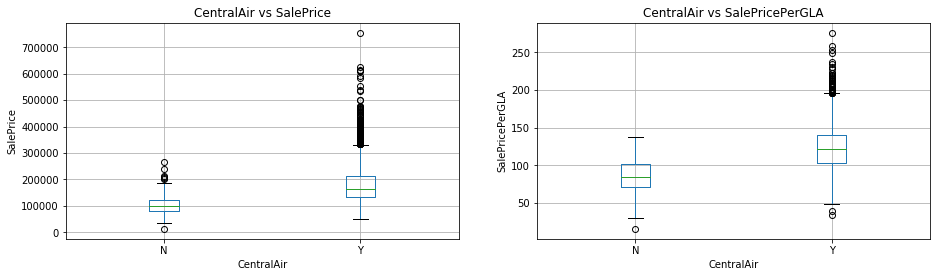

In [43]:
#31       CentralAir
print("CentralAir: Central air conditioning")
print("N	No")
print("Y	Yes")
#print("")
feature = cat_features[31]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

Electrical: Electrical system
SBrkr	Standard Circuit Breakers & Romex
FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)
FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
Mix	Mixed
            Electrical      SalePrice  SalePricePerGLA
Electrical                                            
FuseA              168  123661.035714        97.982648
FuseF               39  105525.948718        89.777894
FuseP                7   91342.857143        89.800777
SBrkr             2364  183376.633672       123.142157


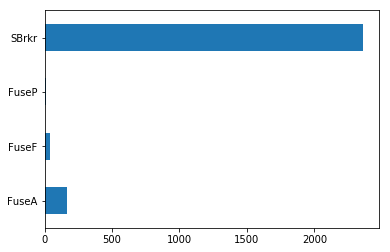

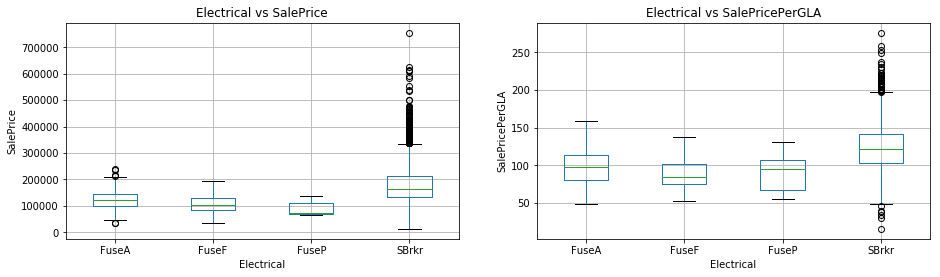

In [44]:
#32 Electrical
print("Electrical: Electrical system")
print("SBrkr	Standard Circuit Breakers & Romex")
print("FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)")
print("FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)")
print("FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)")
print("Mix	Mixed")

feature = cat_features[32]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

KitchenQual: Kitchen quality
Ex	Excellent
Gd	Good
TA	Typical/Average
Fa	Fair
Po	Poor
             KitchenQual      SalePrice  SalePricePerGLA
KitchenQual                                             
Ex                   142  333833.056338       164.358748
Fa                    62  108546.774194        96.679018
Gd                  1017  210017.332350       130.193927
Po                     1  107500.000000        87.826797
TA                  1357  141024.691968       110.531431


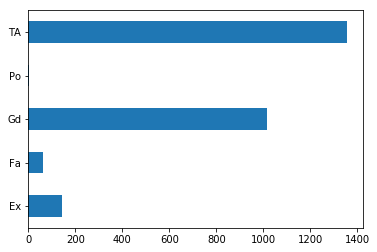

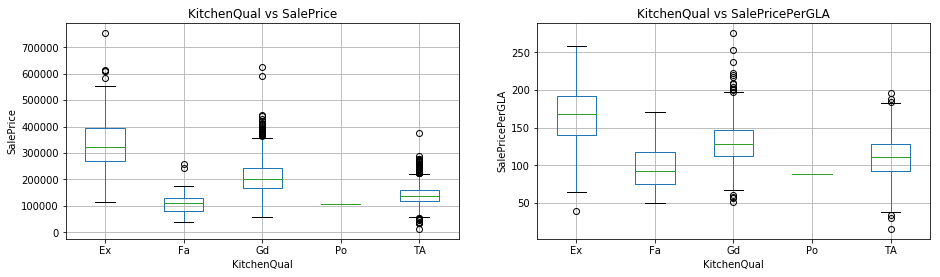

In [45]:
#33 KitchenQual
print("KitchenQual: Kitchen quality")
print("Ex	Excellent")
print("Gd	Good")
print("TA	Typical/Average")
print("Fa	Fair")
print("Po	Poor")

#print("")
feature = cat_features[33]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

Functional: Home functionality (Assume typical unless deductions are warranted)
Typ	Typical Functionality
Min1	Minor Deductions 1
Min2	Minor Deductions 2
Mod	Moderate Deductions
Maj1	Major Deductions 1
Maj2	Major Deductions 2
Sev	Severely Damaged
Sal	Salvage only
            Functional      SalePrice  SalePricePerGLA
Functional                                            
Maj1                18  150091.666667        83.453814
Maj2                 7   98300.571429        77.816710
Min1                57  148425.438596       100.306791
Min2                66  150783.818182        92.989756
Mod                 32  158366.062500        91.222256
Sal                  1   50000.000000        33.692722
Typ               2398  180267.046706       123.004480


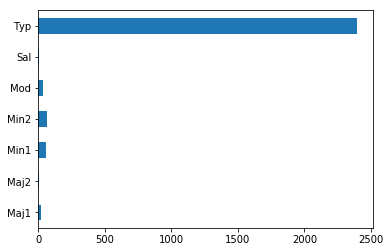

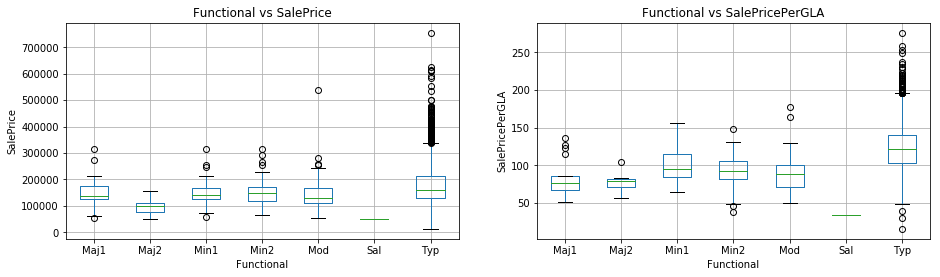

In [46]:
#34 Functional
#print("")
print("Functional: Home functionality (Assume typical unless deductions are warranted)")
print("Typ	Typical Functionality")
print("Min1	Minor Deductions 1")
print("Min2	Minor Deductions 2")
print("Mod	Moderate Deductions")
print("Maj1	Major Deductions 1")
print("Maj2	Major Deductions 2")
print("Sev	Severely Damaged")
print("Sal	Salvage only")

feature = cat_features[34]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

FireplaceQu: Fireplace quality
Ex	Excellent - Exceptional Masonry Fireplace
Gd	Good - Masonry Fireplace in main level
TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
Fa	Fair - Prefabricated Fireplace in basement
Po	Poor - Ben Franklin Stove
NA	No Fireplace
             FireplaceQu      SalePrice  SalePricePerGLA
FireplaceQu                                             
Ex                    35  340444.542857       152.312969
Fa                    70  168482.142857       131.817397
Gd                   618  223066.713592       130.114881
Po                    43  142528.674419       121.134435
TA                   572  204473.805944       120.125857


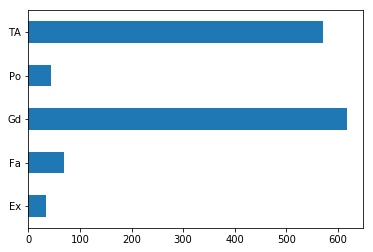

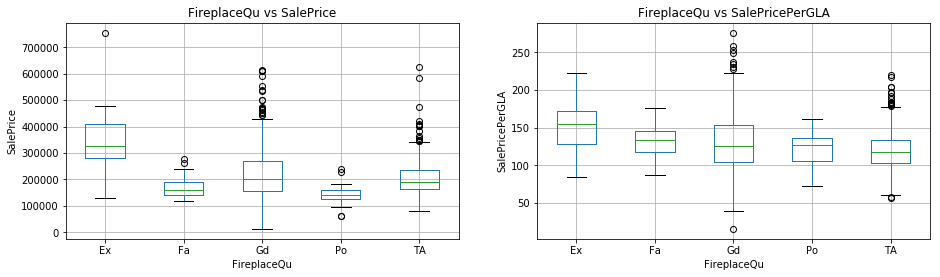

In [47]:
#35 FireplaceQu

print("FireplaceQu: Fireplace quality")
print("Ex	Excellent - Exceptional Masonry Fireplace")
print("Gd	Good - Masonry Fireplace in main level")
print("TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement")
print("Fa	Fair - Prefabricated Fireplace in basement")
print("Po	Poor - Ben Franklin Stove")
print("NA	No Fireplace")

#print("")
feature = cat_features[35]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

GarageType: Garage location
2Types	More than one type of garage
Attchd	Attached to home
Basment	Basement Garage
BuiltIn	Built-In (Garage part of house - typically has room above garage)
CarPort	Car Port
Detchd	Detached from home
NA	No Garage
            GarageType      SalePrice  SalePricePerGLA
GarageType                                            
2Types              21  154080.952381       100.495902
Attchd            1526  200665.934469       130.271692
Basment             27  155150.000000       113.503063
BuiltIn            153  233054.464052       116.381298
CarPort              9  110716.666667       103.763184
Detchd             716  133291.765363       107.640325


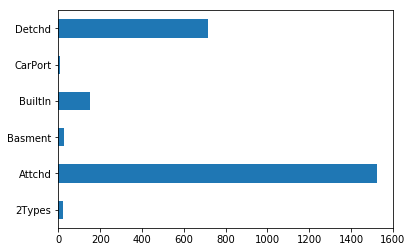

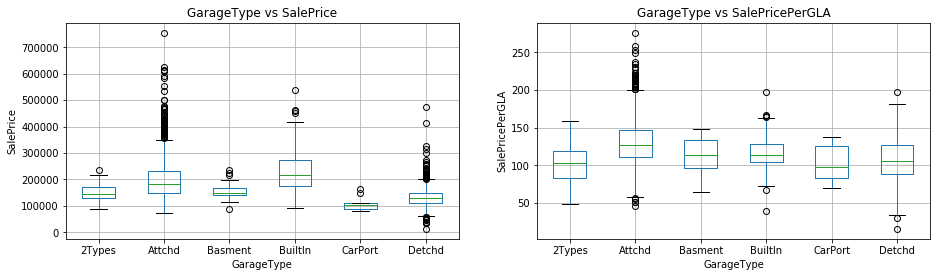

In [48]:
#36 GarageType
print("GarageType: Garage location")
print("2Types	More than one type of garage")
print("Attchd	Attached to home")
print("Basment	Basement Garage")
print("BuiltIn	Built-In (Garage part of house - typically has room above garage)")
print("CarPort	Car Port")
print("Detchd	Detached from home")
print("NA	No Garage")

feature = cat_features[36]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

GarageFinish: Interior finish of the garage
Fin	Finished
RFn	Rough Finished	
Unf	Unfinished
NA	No Garage
              GarageFinish      SalePrice  SalePricePerGLA
GarageFinish                                              
Fin                    621  231925.247987       135.433589
RFn                    718  199724.565460       128.784423
Unf                   1111  142207.855086       110.752119


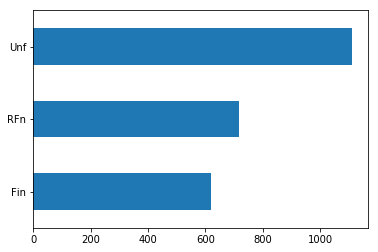

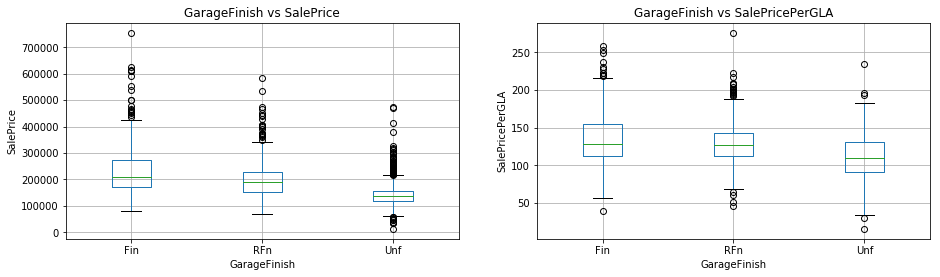

In [49]:
#37 GarageFinish
print("GarageFinish: Interior finish of the garage")
print("Fin	Finished")
print("RFn	Rough Finished	")
print("Unf	Unfinished")
print("NA	No Garage")
#print("")
feature = cat_features[37]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

GarageQual: Garage quality
Ex	Excellent
Gd	Good
TA	Typical/Average
Fa	Fair
Po	Poor
NA	No Garage
            GarageQual      SalePrice  SalePricePerGLA
GarageQual                                            
Ex                   3  241000.000000       144.701883
Fa                 110  118884.100000        95.473303
Gd                  22  242833.500000       134.050758
Po                   4   94350.000000        81.785138
TA                2311  184292.841194       123.498335


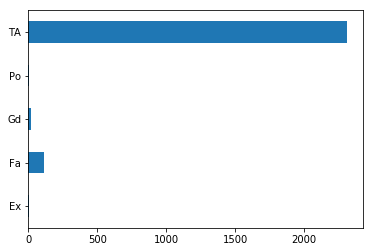

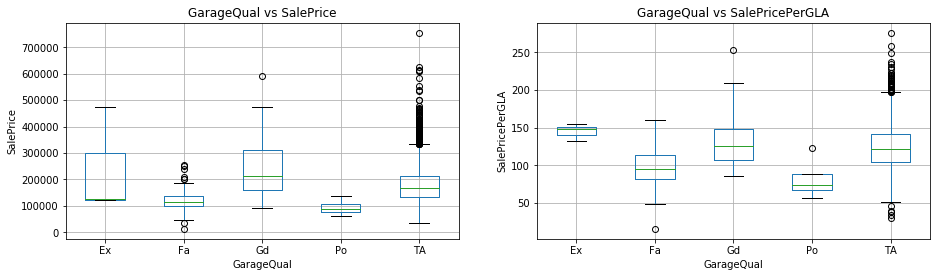

In [50]:
#38 GarageQual
#print("")
print("GarageQual: Garage quality")
print("Ex	Excellent")
print("Gd	Good")
print("TA	Typical/Average")
print("Fa	Fair")
print("Po	Poor")
print("NA	No Garage")
    
feature = cat_features[38]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

GarageCond: Garage condition
Ex	Excellent
Gd	Good
TA	Typical/Average
Fa	Fair
Po	Poor
NA	No Garage
            GarageCond      SalePrice  SalePricePerGLA
GarageCond                                            
Ex                   3  125000.000000       149.814835
Fa                  67  108543.791045        88.055733
Gd                  14  188278.571429       119.644189
Po                  11  106618.181818        84.984921
TA                2355  184273.719745       123.421676


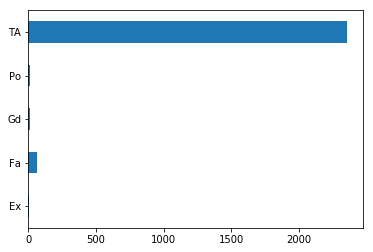

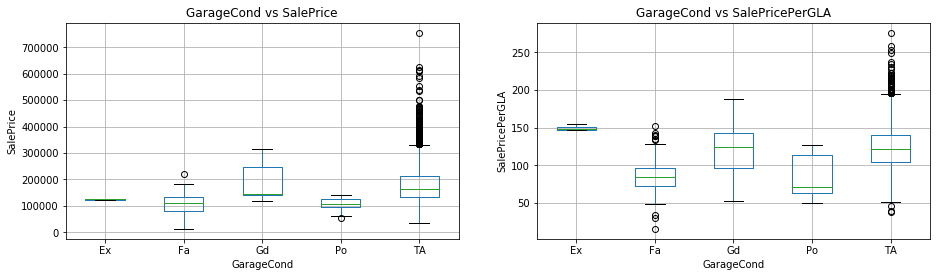

In [51]:
#39 Garage Cond
print("GarageCond: Garage condition")
print("Ex	Excellent")
print("Gd	Good")
print("TA	Typical/Average")
print("Fa	Fair")
print("Po	Poor")
print("NA	No Garage")

feature = cat_features[39]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

PavedDrive: Paved driveway
Y	Paved
P	Partial Pavement
N	Dirt/Gravel
            PavedDrive      SalePrice  SalePricePerGLA
PavedDrive                                            
N                  184  110090.733696        90.992369
P                   60  136108.400000       100.336911
Y                 2335  184486.779015       123.792905


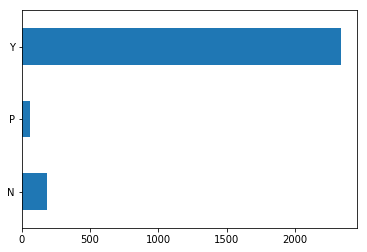

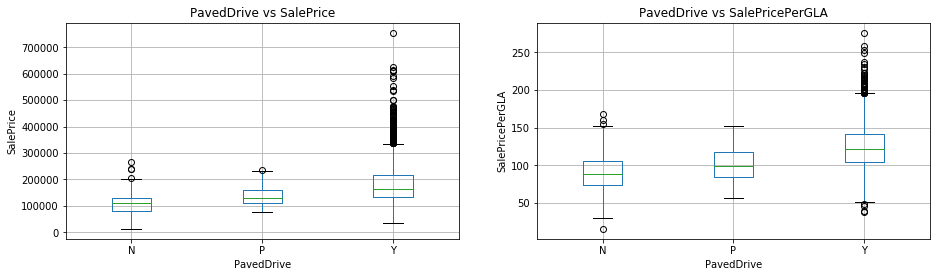

In [52]:
#40 Paved Drive
print("PavedDrive: Paved driveway")
print("Y	Paved")
print("P	Partial Pavement")
print("N	Dirt/Gravel")
feature = cat_features[40]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

PoolQC: Pool quality
Ex	Excellent
Gd	Good
TA	Average/Typical
Fa	Fair
NA	No Pool
        PoolQC  SalePrice  SalePricePerGLA
PoolQC                                    
Ex           2     465000       182.270890
Fa           2     215500       114.036171
Gd           2     215500       125.606613
TA           3     170500        94.073760


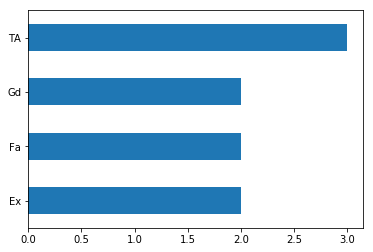

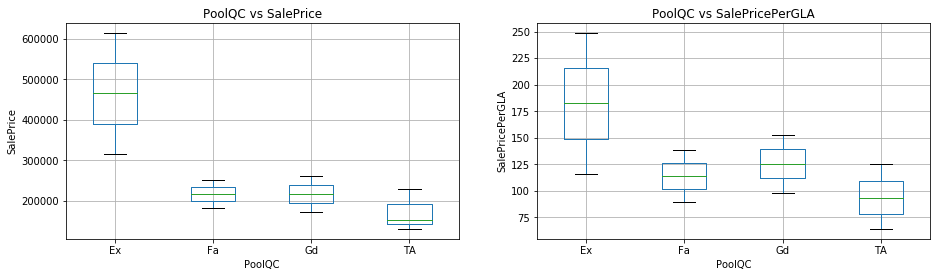

In [53]:
#41 PoolQC
print("PoolQC: Pool quality")
print("Ex	Excellent")
print("Gd	Good")
print("TA	Average/Typical")
print("Fa	Fair")
print("NA	No Pool")
#print("")
feature = cat_features[41]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

Fence: Fence quality
GdPrv	Good Privacy
MnPrv	Minimum Privacy
GdWo	Good Wood
MnWw	Minimum Wood/Wire
NA	No Fence
       Fence      SalePrice  SalePricePerGLA
Fence                                       
GdPrv    111  176726.576577       116.640640
GdWo     103  144750.223301       117.131157
MnPrv    301  146485.810631       116.289595
MnWw      10  131965.000000       116.196454


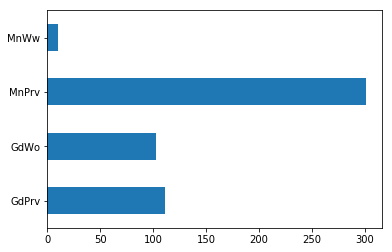

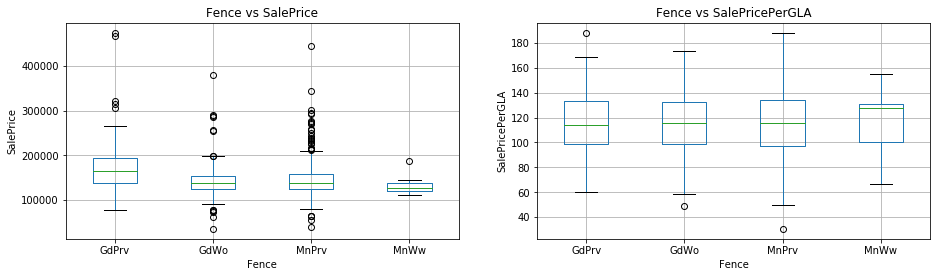

In [54]:
#42 Fence
print("Fence: Fence quality")
print("GdPrv	Good Privacy")
print("MnPrv	Minimum Privacy")
print("GdWo	Good Wood")
print("MnWw	Minimum Wood/Wire")
print("NA	No Fence")

#print("")
feature = cat_features[42]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

MiscFeature: Miscellaneous feature not covered in other categories
Elev	Elevator
Gar2	2nd Garage (if not described in garage section)
Othr	Other
Shed	Shed (over 100 SF)
TenC	Tennis Court
NA	None
             MiscFeature      SalePrice  SalePricePerGLA
MiscFeature                                             
Gar2                   5  147500.000000       119.348322
Othr                   3  124666.666667        99.008061
Shed                  88  156386.363636       113.404361
TenC                   1  250000.000000        89.798851


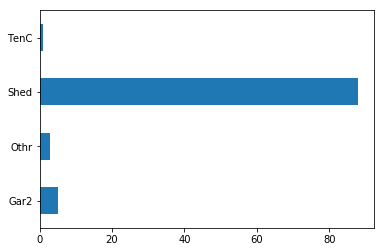

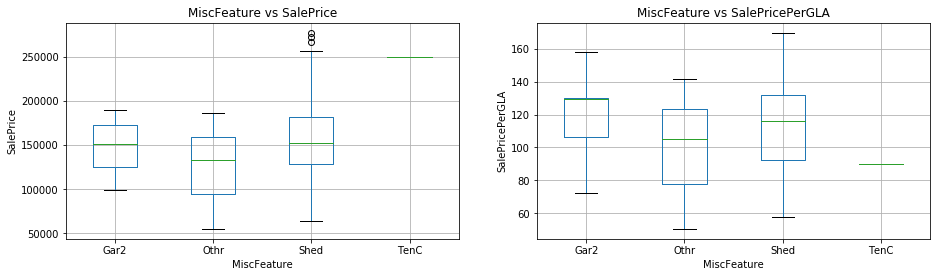

In [55]:
#43 Misc Feature
print("MiscFeature: Miscellaneous feature not covered in other categories")
print("Elev	Elevator")
print("Gar2	2nd Garage (if not described in garage section)")
print("Othr	Other")
print("Shed	Shed (over 100 SF)")
print("TenC	Tennis Court")
print("NA	None")
feature = cat_features[43]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

SaleType: Type of sale
WD	Warranty Deed - Conventional
CWD	Warranty Deed - Cash
VWD	Warranty Deed - VA Loan
New	Home just constructed and sold
COD	Court Officer Deed/Estate
Con	Contract 15% Down payment regular terms
ConLw	Contract Low Down payment and low interest
ConLI	Contract Low Interest
ConLD	Contract Low Down
Oth	Other
          SaleType      SalePrice  SalePricePerGLA
SaleType                                          
COD             50  132694.200000        99.847579
CWD             11  188622.727273       128.659670
Con              5  224446.000000       155.262208
ConLD           23  131284.913043       104.091547
ConLI            7  207992.857143       122.154354
ConLw            8  121937.500000       103.250167
New             79  287670.329114       160.254445
Oth              4  103572.750000        98.797810
VWD              1  137000.000000       116.496599
WD            2391  175926.301966       120.195868


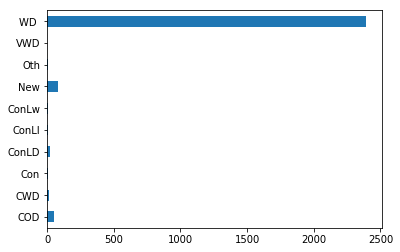

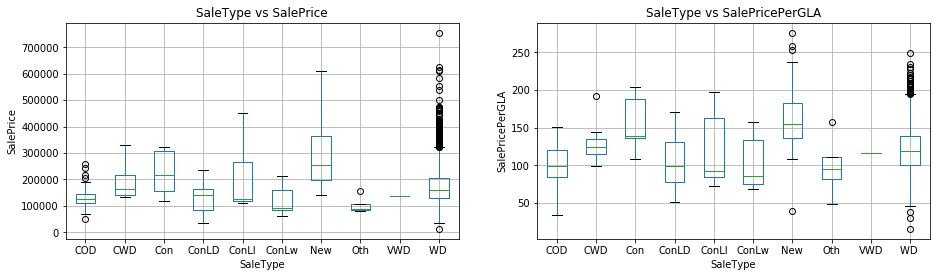

In [56]:
#44 SaleType
print("SaleType: Type of sale")
print("WD\tWarranty Deed - Conventional")
print("CWD\tWarranty Deed - Cash")
print("VWD\tWarranty Deed - VA Loan")
print("New\tHome just constructed and sold")
print("COD\tCourt Officer Deed/Estate")
print("Con\tContract 15% Down payment regular terms")
print("ConLw\tContract Low Down payment and low interest")
print("ConLI\tContract Low Interest")
print("ConLD\tContract Low Down")
print("Oth\tOther")

feature = cat_features[44]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()


SaleCondition: Condition of sale
Normal	Normal Sale
Abnorml	Abnormal Sale -  trade, foreclosure, short sale
AdjLand	Adjoining Land Purchase
Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
Family	Sale between family members
Partial	Home was not completed when last assessed (associated with New Homes)
               SaleCondition      SalePrice  SalePricePerGLA
SaleCondition                                               
Abnorml                   61  143739.754098       103.796582
AdjLand                    2  138750.000000        91.929256
Alloca                     4  156766.500000       108.061200
Family                    17  146958.823529        98.136549
Normal                  2413  175567.643183       120.200702
Partial                   82  285172.121951       160.474809


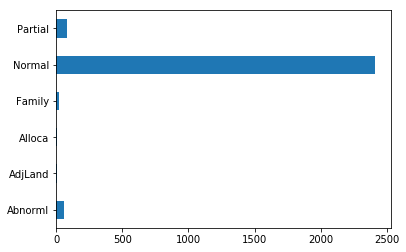

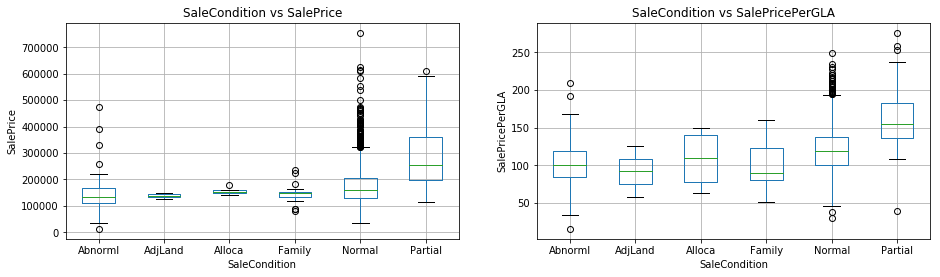

In [57]:
#45 SaleCondition
#print("")
print("SaleCondition: Condition of sale")
print("Normal	Normal Sale")
print("Abnorml	Abnormal Sale -  trade, foreclosure, short sale")
print("AdjLand	Adjoining Land Purchase")
print("Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	")
print("Family	Sale between family members")
print("Partial	Home was not completed when last assessed (associated with New Homes)")

feature = cat_features[45]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice", "SalePricePerGLA"]].dropna().groupby(
    by=feature,axis=0).agg({feature:"count", "SalePrice":"mean","SalePricePerGLA":"mean"}))

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()